# Regression examples

In [1]:
import numpy as np
import seaborn as sns
%matplotlib inline
import pingouin as pg
import pandas as pd


## Simple linear regression

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


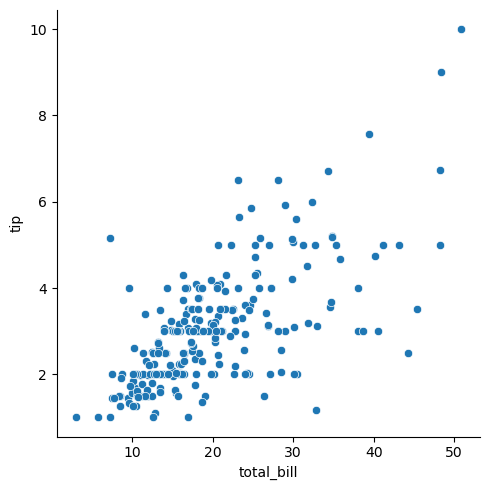

In [4]:
sns.relplot(x='total_bill',y='tip',data=tips)

<Axes: xlabel='total_bill', ylabel='tip'>

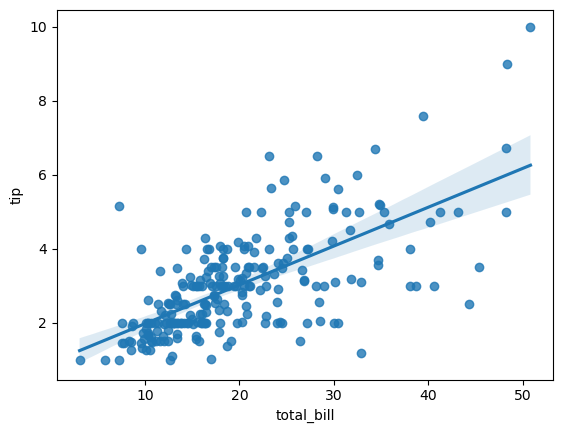

In [5]:
sns.regplot(x='total_bill',y='tip',data=tips)

In [6]:
pg.linear_regression(tips['total_bill'],tips['tip']).round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.92,0.16,5.76,0.0,0.46,0.45,0.61,1.23
1,total_bill,0.11,0.01,14.26,0.0,0.46,0.45,0.09,0.12


Building a model from the regression:

In [7]:
def tip(total_bill):
    return 0.92 + 0.11 * total_bill

In [8]:
tip(50)

6.42

In [9]:
tip(150)

17.42

In [10]:
pg.linear_regression(tips[['total_bill','size']],tips['tip']).round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.67,0.19,3.46,0.00,0.47,0.46,0.29,1.05
1,total_bill,0.09,0.01,10.17,0.00,0.47,0.46,0.07,0.11
2,size,0.19,0.09,2.26,0.02,0.47,0.46,0.02,0.36


## Nonlinear regression

In [12]:
x = np.linspace(-100,100,1000)
y = 4*x**2 + 2*x + 3
df = pd.DataFrame({'x':x,'y':y})


In [13]:
df.head()

,x,y
0,-100.000000,39803.000000
1,-99.799800,39643.400561
2,-99.599600,39484.121762
3,-99.399399,39325.163605
4,-99.199199,39166.526089


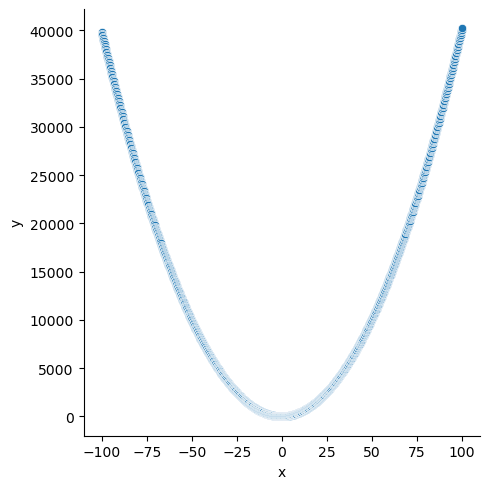

In [14]:
sns.relplot(x='x',y='y',data=df)

<Axes: xlabel='x', ylabel='y'>

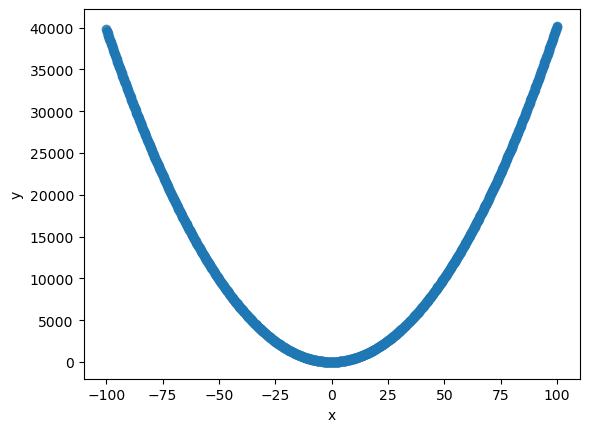

In [17]:
sns.regplot(x='x',y='y',order=2,data=df)

In [18]:
df['x2'] = df['x']**2

In [20]:
pg.linear_regression(df[['x','x2']],df['y']).round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,3.0,0.0,1.659240e+13,0.0,1.0,1.0,3.0,3.0
1,x,2.0,0.0,9.589218e+14,0.0,1.0,1.0,2.0,2.0
2,x2,4.0,0.0,9.913595e+16,0.0,1.0,1.0,4.0,4.0


## Logistic regression

In [21]:
titanic = sns.load_dataset('titanic')

In [22]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


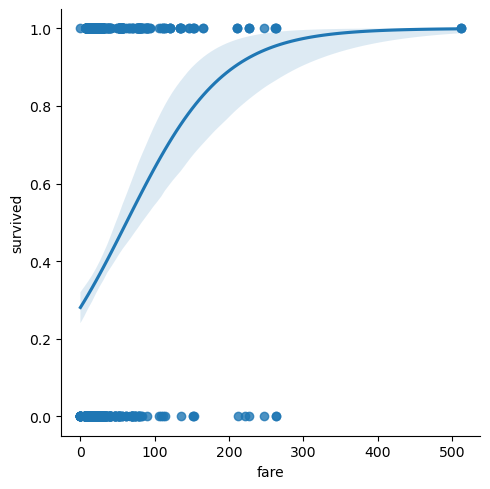

In [23]:
sns.lmplot(x='fare',y='survived',logistic=True,data=titanic)

In [24]:
pg.logistic_regression(titanic['fare'],titanic['survived']).round(2)

,names,coef,se,z,pval,CI[2.5%],CI[97.5%]
0,Intercept,-0.94,0.1,-9.89,0.0,-1.13,-0.75
1,fare,0.02,0.0,6.81,0.0,0.01,0.02
